# PHSCD - Palmar Hand Segmentation, Classification, and Detection

Este notebook demonstra o funcionamento das principais funções do módulo `phscd.py`, utilizado para segmentação, detecção e recorte de mãos em imagens, com aplicação em biometria palmar.  


In [1]:
from phscd import phscd
import matplotlib.pyplot as plt
import cv2

### O modelo treinado utilizado está localizado na pasta `model`, com o nome `yolo_hand_phscd.pt`

In [2]:
model = phscd.YOLO("phscd/model/yolo_hand_phscd.pt")

#### Exemplo de Uso

Imagem pública obtida da base de dados CASIA. Disponível em: [http://english.ia.cas.cn/db/201611/t20161101_169937.html](http://english.ia.cas.cn/db/201611/t20161101_169937.html)

In [3]:
img_bgr = cv2.imread('exemplo.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

### Exemplo de Uso - Segmentação da Mão

A função `phscd.maskHand(imagem, model)`realiza a segmentação da mão presente na imagem.  


**Retorno:**  
- Imagem da mão recortada com dimensões quadradas (largura e altura iguais), pronta para uso em modelos de predição, como redes siamesas;  
- Coordenadas da bounding box, referentes à resolução da imagem original;  
- Máscara binária da segmentação, gerada com base na resolução da imagem original.


In [4]:
imagem_segmentada, coords, mascara = phscd.maskHand(img_gray, model)

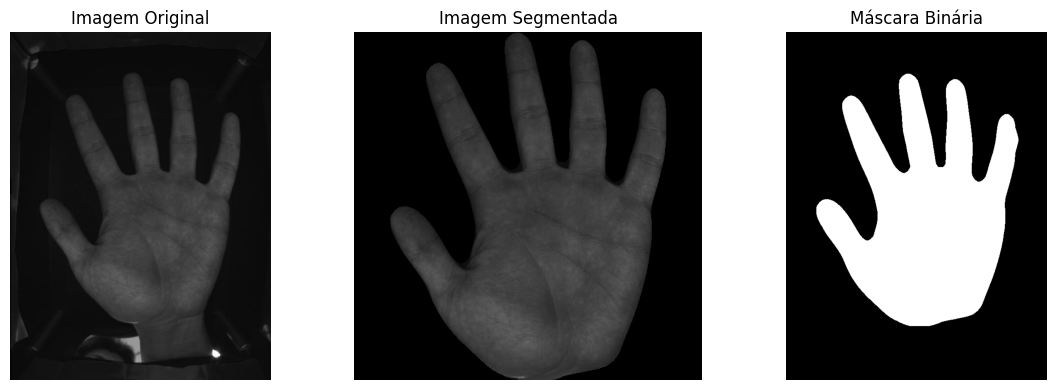

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

titulos = ["Imagem Original", "Imagem Segmentada", "Máscara Binária"]
imagens = [img_gray, imagem_segmentada, mascara]

for ax, img, titulo in zip(axs, imagens, titulos):
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(titulo)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Exemplo de Uso - Recorte da Mão


A função `phscd.cropHand(imagem, coordenadas)` permite recortar o objeto de interesse, inserindo bordas pretas para manter a imagem com formato quadrado. Esse procedimento assegura que todas as mãos sejam mantidas na mesma proporção, evitando distorções morfológicas caso as imagens sejam redimensionadas.

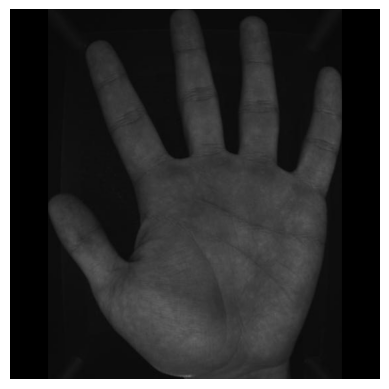

In [7]:
imagem_crop = phscd.cropHand(img_gray, coords)
plt.imshow(imagem_crop)
plt.axis('off')
plt.show()

### Exemplo de Uso - Desenho da Bounding Box na Mão

A partir das coordenadas retornadas pela função `phscd.maskHand`, é possível desenhar a bounding box diretamente sobre a imagem original.  


Mas para fins de otimização, é possível obter somente as coordenadas através da função `coordenadas = phscd.coordinateHand(imagem, modelo)`

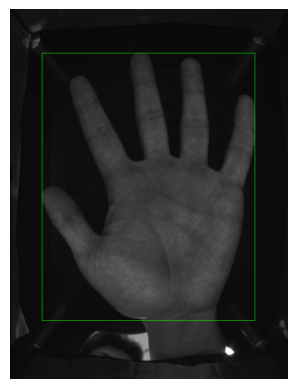

In [9]:
bounding_box = phscd.desenhar_bounding_box(img_gray, coords, 1)
plt.imshow(bounding_box)
plt.axis('off')
plt.show()

### Exemplo de Uso - Máscara com Triangulação Biométrica

A função `desenhar_triangulos_biometria(img, mascara, densidade_pontos=2000, espessura=2, alpha=1.0, color=(0, 255, 0))` realiza a representação visual de triângulos sobre a mão, com o objetivo de analisar o comportamento das máscaras em sistemas com tela LCD.

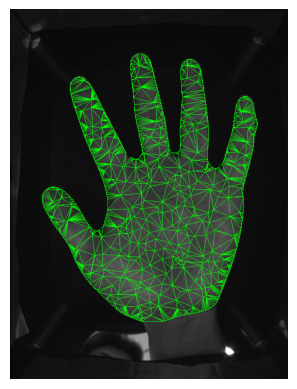

In [10]:
triangulos = phscd.desenhar_triangulos_biometria(img_gray, mascara, 1024, 1)
plt.imshow(triangulos)
plt.axis('off')
plt.show()

### Exemplo de Uso - Processamento em Lote

A função `folder_process(model, folder_path, mode)` percorre recursivamente todas as pastas e subpastas dentro de `folder_path`, processando imagens no formato JPG, JPEG e PNG conforme o modo especificado:

- `'S'`: aplica segmentação da mão  
- `'C'`: realiza o recorte da mão  
- `'M'`: gera a máscara binária da mão  

Antes de qualquer modificação, a função gera um arquivo `.zip` como backup de todo o conteúdo original. Após isso, substitui cada imagem pela versão processada correspondente. Imagens em que a mão não é detectada são registradas no arquivo `imagens_sem_mao.txt`.

Retorna `True` se todo o processamento for concluído.